S Tse
7/31/19

As requested by Erin Cooper, this notebook accesses our Disaster Resilience database to explore varous PDX neighborhood metrics of impact to help inform game development for the post-earthquake scenario.

In [1]:
import pandas as pd
import psycopg2 
import sqlalchemy
from dotenv import load_dotenv, find_dotenv
import os
import seaborn as sns

In [2]:
# acquire DB secrets from .env file
load_dotenv(find_dotenv())

True

In [3]:
db_string = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
             .format(username=os.environ.get("PG_USER"),
                    password=os.environ.get("PG_PASSWORD"),
                    ipaddress=os.environ.get("PG_HOST"),
                    port=os.environ.get("PG_PORT"),
                    dbname=os.environ.get("PG_DATABASE")))

In [4]:
db_conn = sqlalchemy.create_engine(db_string)

In [5]:
df_neighborhood = pd.read_sql_query('''SELECT * FROM public.neighborhood;''', db_conn)

In [6]:
df_neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
id                      102 non-null int64
name                    102 non-null object
census_response_rate    102 non-null object
quadrant                102 non-null object
acres                   102 non-null object
buildingcount           102 non-null object
buildingsquarefeet      102 non-null object
buildingcost            102 non-null object
buildingweight          102 non-null object
contentcost             102 non-null object
permanentresidents      102 non-null object
dayoccupants            102 non-null object
nightoccupants          102 non-null object
total_population        102 non-null object
dtypes: int64(1), object(13)
memory usage: 11.2+ KB


In [7]:
# grab only wet scenario impact data from loss_neighbhorood_census table
df_ln = pd.read_sql_query('''SELECT * FROM public.loss_neighborhood_census WHERE scenario_cd = 'wet';''', db_conn)

In [8]:
df_ln.head()

,id,neighborhood_id,scenario_cd,buildingloss,contentloss,debris,displacedpopulation,buildings_nodamage,buildings_slightdamage,buildings_moderatedamage,...,casualtieslevel3_day,fatalitiestotal_day,casualtiestotal_night,casualtieslevel1_night,casualtieslevel2_night,casualtieslevel3_night,fatalitiestotal_night,injuriestotal_day,injuriestotal_night,displaced_percap
0,1,0,wet,35125209.55624744,10720142.440013727,10035.620168880481,163.46085333765328,1441.614967637849,511.37554296428607,201.57811283957668,...,0.8430052781154163,1.6465635444182012,15.131460350016788,11.92249504316224,2.730758591401405,0.17959584954143226,0.29860474687585653,27.343893602409203,14.832849484105076,0.03135037463322848
1,2,1,wet,31343960.951078814,9647934.547535356,10714.385025891479,155.9115673004278,1863.3201044046627,742.7487814617582,318.7387005741461,...,0.20589264682878416,0.3863420860911759,16.428936812100115,12.919070596598257,2.906162615494618,0.22024787976265414,0.38345106580041727,11.390552262861274,16.045481091855542,0.02533911381446901
2,3,2,wet,7088838.432398895,3099131.2189266956,2904.767216926713,25.280997888155916,129.92713885158796,50.44230096591062,21.37502965729618,...,0.07035290633602144,0.1316583053654635,2.4508885428748703,1.8981573770638829,0.4591549029001778,0.03441799003205027,0.05915666562664338,3.2550840728188333,2.3917302699961107,0.05159387324113452
3,4,3,wet,86064662.587269,31353417.416837797,41736.81981519507,202.15955896303893,1055.699178644764,374.55082135523617,180.8973305954826,...,1.6242351507392196,3.148164223819302,29.324330225872693,22.167891045174535,5.419387072689939,0.5989011692772075,1.1381512975154011,52.905484667576985,28.18617928714167,0.03365960022694621
4,5,4,wet,71692023.80952379,21701240.99702381,28716.197916666664,264.3347321428571,107.48139880952382,61.1421130952381,41.83407738095238,...,1.2868612723214286,2.5219190848214286,26.872924107142865,19.58272470238095,5.433088169642857,0.6394950148809524,1.2176355282738096,40.48860978422619,25.65530788690476,0.3055892857142857


In [9]:
# drop the id column to prevent two columns with name id that mean different things
df_ln.drop(columns='id', inplace=True)

In [10]:
df_ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 24 columns):
neighborhood_id              102 non-null int64
scenario_cd                  102 non-null object
buildingloss                 102 non-null object
contentloss                  102 non-null object
debris                       102 non-null object
displacedpopulation          102 non-null object
buildings_nodamage           102 non-null object
buildings_slightdamage       102 non-null object
buildings_moderatedamage     102 non-null object
buildings_extensivedamage    102 non-null object
buildings_completedamage     102 non-null object
casualtiestotal_day          102 non-null object
casualtieslevel1_day         102 non-null object
casualtieslevel2_day         102 non-null object
casualtieslevel3_day         102 non-null object
fatalitiestotal_day          102 non-null object
casualtiestotal_night        102 non-null object
casualtieslevel1_night       102 non-null object
casualtiesleve

In [11]:
# join the two tables on neighborhood ID
df_neighborhood = df_neighborhood.merge(df_ln, left_on='id', right_on='neighborhood_id', how='inner')

In [12]:
df_neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 38 columns):
id                           102 non-null int64
name                         102 non-null object
census_response_rate         102 non-null object
quadrant                     102 non-null object
acres                        102 non-null object
buildingcount                102 non-null object
buildingsquarefeet           102 non-null object
buildingcost                 102 non-null object
buildingweight               102 non-null object
contentcost                  102 non-null object
permanentresidents           102 non-null object
dayoccupants                 102 non-null object
nightoccupants               102 non-null object
total_population             102 non-null object
neighborhood_id              102 non-null int64
scenario_cd                  102 non-null object
buildingloss                 102 non-null object
contentloss                  102 non-null object
debris         

In [13]:
# convert dtype of numerical columns of interest 

convert_dict = {'census_response_rate': float,
                'contentloss': float, 
                'buildingloss': float,
                'casualtiestotal_day': float,
                'debris': float,
                'displacedpopulation':float          
               } 
  
df_neighborhood = df_neighborhood.astype(convert_dict) 

In [14]:
# top 5 for highest content cost
df_neighborhood[['id','name', 'buildingloss']].sort_values(by='buildingloss',ascending=False)[:5]

,id,name,buildingloss
23,23,DOWNTOWN,2.515984e+09
24,24,EAST COLUMBIA,1.203951e+09
67,67,PARKROSE,1.001833e+09
66,66,OVERLOOK,8.341900e+08
69,69,PEARL,7.907481e+08


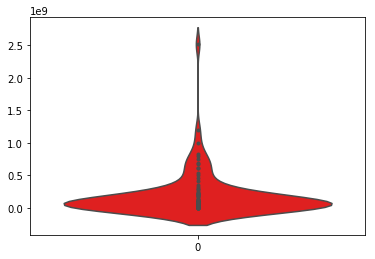

In [15]:
sns.violinplot(data=df_neighborhood['buildingloss'], inner="points", color='red')

In [16]:
# top 5 for highest content cost
df_neighborhood[['id','name', 'contentloss']].sort_values(by='contentloss',ascending=False)[:5]

,id,name,contentloss
23,23,DOWNTOWN,9.391970e+08
24,24,EAST COLUMBIA,6.552390e+08
67,67,PARKROSE,4.546555e+08
66,66,OVERLOOK,4.369328e+08
90,91,SUNDERLAND,3.444396e+08


Text(0.5, 1.0, 'Violin Plot of Neighborhood contentloss')

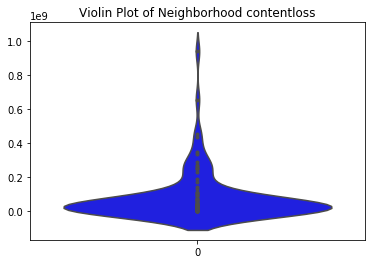

In [17]:
sns.violinplot(data=df_neighborhood['contentloss'], inner="points",color='blue').set_title('Violin Plot of Neighborhood contentloss')

In [18]:
# top 5 for census response rate (indicator of social capital)
df_neighborhood[['id','name', 'census_response_rate']].sort_values(by='census_response_rate',ascending=False)[:5]

,id,name,census_response_rate
93,94,TRYON CREEK AREA,91.004122
18,18,COLLINS VIEW,90.408141
0,0,ALAMEDA,90.066127
12,12,BRIDLEMILE/SOUTHWEST HILLS,89.892406
76,77,RIVERVIEW CEMETERY AREA,89.261505


In [19]:
# bottom 5 for census response rate 
df_neighborhood[['id','name', 'census_response_rate']].sort_values(by='census_response_rate',ascending=True)[:5]

,id,name,census_response_rate
31,31,GLENFAIR,64.584736
73,74,POWELLHURST-GILBERT,69.680139
67,67,PARKROSE,70.947678
65,65,OLD TOWN/ CHINATOWN,71.146176
71,71,PORTLAND PDX AIRPORT AREA,71.700000


Text(0.5, 1.0, 'Violin Plot of Neighborhood Census Reponse Rate')

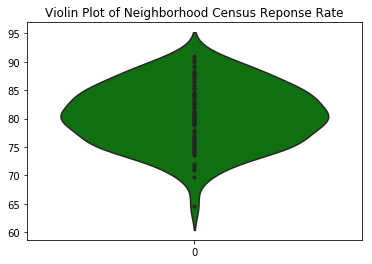

In [20]:
sns.violinplot(data=df_neighborhood['census_response_rate'], inner="points",color='green').set_title('Violin Plot of Neighborhood Census Reponse Rate')

In [21]:
# top 5 for casualtiestotal_day
df_neighborhood[['id','name', 'casualtiestotal_day']].sort_values(by='casualtiestotal_day',ascending=False)[:5]

,id,name,casualtiestotal_day
23,23,DOWNTOWN,1918.076200
24,24,EAST COLUMBIA,989.067065
14,14,BUCKMAN,765.814833
67,67,PARKROSE,740.820155
66,66,OVERLOOK,723.315079


Text(0.5, 1.0, 'Violin Plot of Neighborhood casualtiestotal_day')

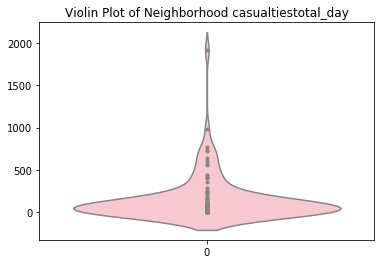

In [22]:
sns.violinplot(data=df_neighborhood['casualtiestotal_day'], inner="points",color='pink').set_title('Violin Plot of Neighborhood casualtiestotal_day')

In [23]:
# top 5 for debris
df_neighborhood[['id','name', 'debris']].sort_values(by='debris',ascending=False)[:5]

,id,name,debris
23,23,DOWNTOWN,1.466380e+06
24,24,EAST COLUMBIA,5.982837e+05
67,67,PARKROSE,5.150666e+05
69,69,PEARL,4.777734e+05
66,66,OVERLOOK,4.192859e+05


Text(0.5, 1.0, 'Violin Plot of Neighborhood debris')

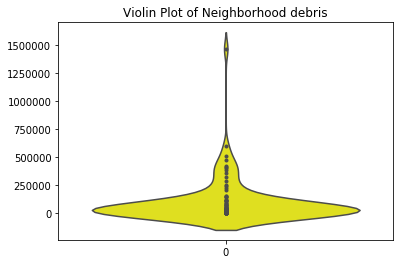

In [24]:
sns.violinplot(data=df_neighborhood['debris'], inner="points",color='yellow').set_title('Violin Plot of Neighborhood debris')

In [25]:
# top 5 for displaced population
df_neighborhood[['id','name', 'displacedpopulation']].sort_values(by='displacedpopulation',ascending=False)[:5]

,id,name,displacedpopulation
23,23,DOWNTOWN,2251.888094
69,69,PEARL,1833.105676
32,32,GOOSE HOLLOW,1603.331238
61,61,NORTHWEST DISTRICT,1472.075945
65,65,OLD TOWN/ CHINATOWN,1420.905737


Text(0.5, 1.0, 'Violin Plot of Neighborhood displacedpopulation')

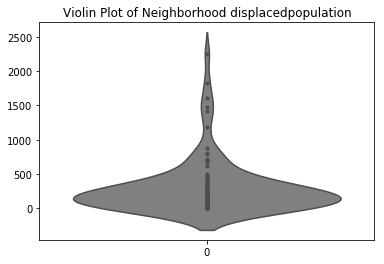

In [26]:
sns.violinplot(data=df_neighborhood['displacedpopulation'], inner="points",color='grey').set_title('Violin Plot of Neighborhood displacedpopulation')